In [18]:
# import pandas
import pandas as pd

# import input output reader
import io

# import pyplot untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# import train_test_split untuk membagi data test dan data train
from sklearn.model_selection import train_test_split

# import SVC classifier
from sklearn.svm import SVC

# import matriks untuk menghitung skor akurasi
from sklearn.metrics import accuracy_score

# import confusion matrix
from sklearn.metrics import confusion_matrix

In [19]:
from google.colab import files
file = files.upload()

Saving raisin.csv to raisin (1).csv


In [20]:
#1. Membaca file inputan

df = pd.read_csv(io.BytesIO(file['raisin.csv']), sep=';')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [21]:
#2. Informasi data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [22]:
#3. Cek distribusi kolom class

df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [23]:
#4. Encode kolom Class

label_mapping = {'Kecimen': 0, 'Besni': 1}
df['Class'] = df['Class'].replace(label_mapping)
display(df)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [24]:
#5. Cek missing value

df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0, 0.5, 'Perimeter')

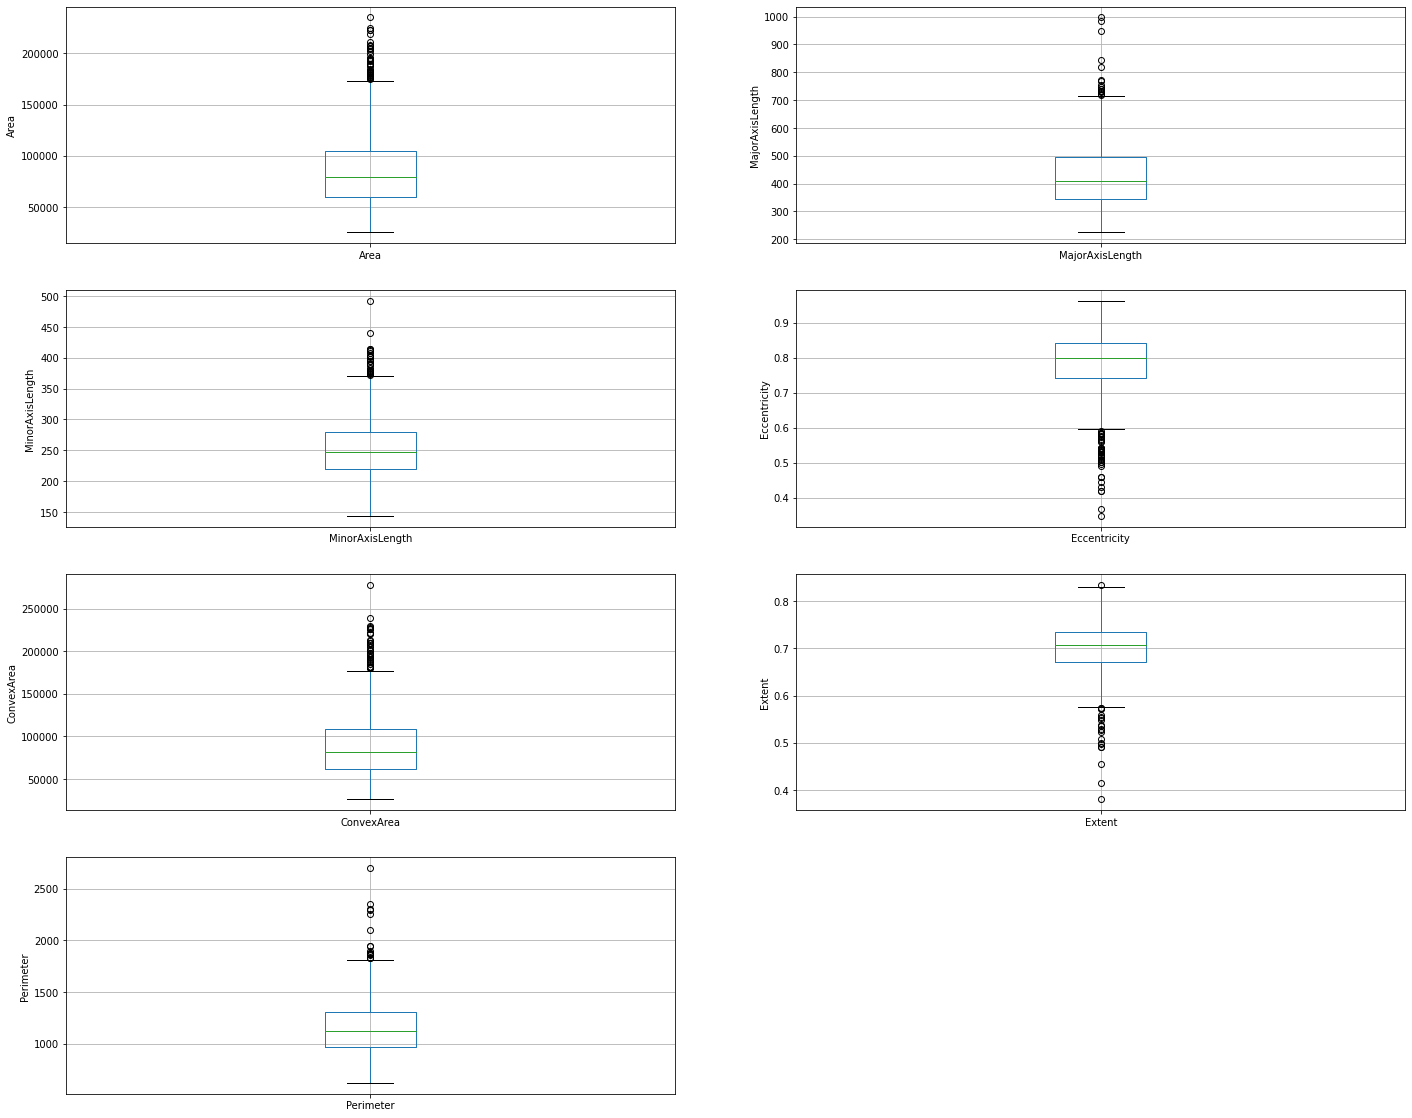

In [25]:
#6. Visualisasi boxplot untuk melihat outlier

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='MajorAxisLength')
fig.set_title('')
fig.set_ylabel('MajorAxisLength')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='MinorAxisLength')
fig.set_title('')
fig.set_ylabel('MinorAxisLength ')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='Eccentricity')
fig.set_title('')
fig.set_ylabel('Eccentricity')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='ConvexArea')
fig.set_title('')
fig.set_ylabel('ConvexArea')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='Extent')
fig.set_title('')
fig.set_ylabel('Extent')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='Perimeter')
fig.set_title('')
fig.set_ylabel('Perimeter')

In [26]:
#7. Data Feature dan Data Target

x = df.drop(['Class'], axis=1)
y = df['Class']

In [37]:
#8. Split Data Train dan Data Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape

((720, 7), (180, 7))

In [27]:
#9. Menskalakan data feature
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
#10. SVM Linear

##C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(x_train,y_train)
y_pred_test=linear_svc.predict(x_test)

##C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 
linear_svc100.fit(x_train,y_train)
y_pred_test100=linear_svc100.predict(x_test)

##C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 
linear_svc1000.fit(x_train,y_train)
y_pred_test1000=linear_svc1000.predict(x_test)

print('Skor akurasi model dengan linear kernel dan dengan C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Skor akurasi model dengan linear kernel dan dengan C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test100)))
print('Skor akurasi model dengan linear kernel dan dengan C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test1000)))

Skor akurasi model dengan linear kernel dan dengan C=1.0 : 0.9056
Skor akurasi model dengan linear kernel dan dengan C=100.0 : 0.9111
Skor akurasi model dengan linear kernel dan dengan C=1000.0 : 0.9056


In [29]:
#11. Membandingkan test set dan train set akurasi

y_pred_train = linear_svc100.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8667


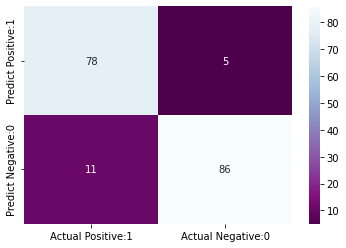

In [30]:
#12. Confusion matrix

cm = confusion_matrix(y_test, y_pred_test100)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='BuPu_r')

In [31]:
#14. Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test100))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        83
           1       0.95      0.89      0.91        97

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180

